# sentiment anaylis

### Import datasets

In [4]:
import pandas as pd

DATASETS = '~/datasets/sentiment_economy_news/'

train = pd.read_parquet(DATASETS + 'train.parquet', engine='pyarrow')
test  = pd.read_parquet(DATASETS + 'test.parquet', engine='pyarrow')

print(train.tail())
print(train.info())

print(test.tail())
print(test.info())

                                                   text    labels  \
2995  'Derogatory' Files Ended Service Of 383 U. S. ...  negative   
2996  Treasury Securities Are Becalmed: Investors Aw...  negative   
2997  SENATE TEST WON BY RIGHTS FORCES: PANEL VOTES ...  negative   
2998  FARMERS PUNISHED IN WETBACK' DRIVE: SOME PERMI...  negative   
2999  EXECUTIVE HIRING EXPECTED TO RISE: STUDY SHOWS...  positive   

          articleid relevance positivity  split positivity_rounded   idx  
2995  nyt_113139986       yes        2.0  train                2.0  2995  
2996  nyt_108972463       yes        4.0  train                4.0  2996  
2997  nyt_119217245       yes        4.0  train                4.0  2997  
2998  nyt_112200942       yes        4.0  train                4.0  2998  
2999  nyt_119481498       yes        6.5  train                6.0  2999  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column              Non-

In [20]:
X_train = train['text'].copy()
Y_train = pd.Categorical(train['labels'])
print(X_train)

['positive', 'negative', 'negative', 'negative', 'negative', ..., 'negative', 'negative', 'negative', 'negative', 'positive']
Length: 3000
Categories (2, object): ['negative', 'positive']


### Create Classifier model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_tokens = vectorizer.fit_transform(train["text"])

print(X_train_tokens.shape)

print(vectorizer.vocabulary_.get(u'service'))

(3000, 30859)
24813


In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()

X_train_tf = transformer.fit_transform(X_train_tokens)

print(X_train_tf.shape)

(3000, 30859)


In [46]:
from sklearn.naive_bayes import GaussianNB

Y_train = pd.Categorical(train['labels'])

print(Y_train)

clf = GaussianNB().fit(X_train_tf.toarray(), Y_train)

['positive', 'negative', 'negative', 'negative', 'negative', ..., 'negative', 'negative', 'negative', 'negative', 'positive']
Length: 3000
Categories (2, object): ['negative', 'positive']


In [48]:
from sklearn.metrics import classification_report

X_test_tokens = vectorizer.transform(test['text'])
X_test_tf = transformer.transform(X_test_tokens)

#print(test['text'])
# print(X_test_tf)

predicted = clf.predict(X_test_tf.toarray())

labels = Y_train.categories

Y_test = pd.Categorical(test['labels'])

print(classification_report(Y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

    negative       0.62      0.78      0.69       241
    positive       0.34      0.19      0.24       141

    accuracy                           0.56       382
   macro avg       0.48      0.49      0.47       382
weighted avg       0.52      0.56      0.53       382



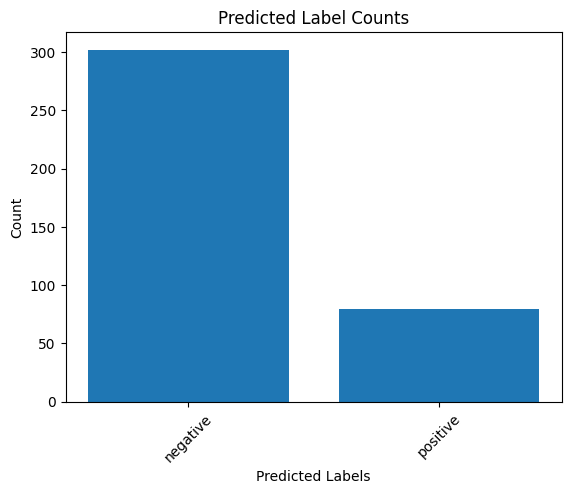

In [49]:
import matplotlib.pyplot as plt 
from collections import Counter

label_counts = Counter(predicted)

# Extract labels and counts as separate lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Bernoulli Naive Bayes USE THISS

In [1]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt 
from collections import Counter

Y_train = pd.Categorical(train['labels'])

clf = BernoulliNB().fit(X_train_tf.toarray(), Y_train)

X_test_tokens = vectorizer.transform(test['text'])
X_test_tf = transformer.transform(X_test_tokens)

predicted = clf.predict(X_test_tf.toarray())

labels = Y_train.categories

Y_test = pd.Categorical(test['labels'])

print(classification_report(Y_test, predicted, target_names=labels))

label_counts = Counter(predicted)

# Extract labels and counts as separate lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'pd' is not defined

### TESTT

              precision    recall  f1-score   support

    negative       0.63      1.00      0.77       241
    positive       0.00      0.00      0.00       141

    accuracy                           0.63       382
   macro avg       0.32      0.50      0.39       382
weighted avg       0.40      0.63      0.49       382



/home/bkadmin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bkadmin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bkadmin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


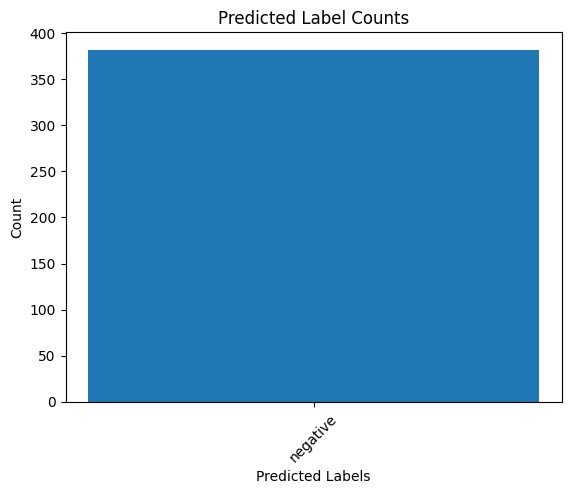

In [53]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from collections import Counter

Y_train = pd.Categorical(train['labels'])

clf = CategoricalNB().fit(X_train_tf.toarray(), Y_train)

X_test_tokens = vectorizer.transform(test['text'])
X_test_tf = transformer.transform(X_test_tokens)

predicted = clf.predict(X_test_tf.toarray())

labels = Y_train.categories

Y_test = pd.Categorical(test['labels'])

print(classification_report(Y_test, predicted, target_names=labels))

label_counts = Counter(predicted)

# Extract labels and counts as separate lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Model Pipeline

              precision    recall  f1-score   support

    negative       0.70      0.86      0.77       241
    positive       0.60      0.37      0.46       141

    accuracy                           0.68       382
   macro avg       0.65      0.61      0.61       382
weighted avg       0.66      0.68      0.66       382



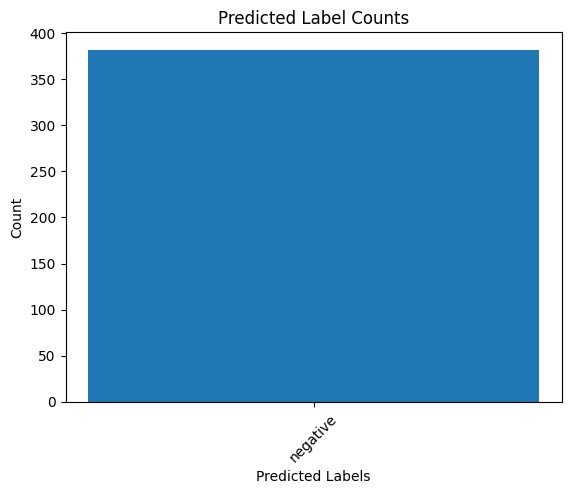

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

title_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB()),
])

X_train = train['text'] #.toarray()
X_test = test['text'] #.toarray()

Y_train = pd.Categorical(train['labels'])
Y_test = pd.Categorical(test['labels'])
labels = Y_train.categories

title_clf.fit(X_train, Y_train)

#X_test_tokens = vectorizer.transform(test['text'])
#X_test_tf = transformer.transform(X_test_tokens)

predicted2 = title_clf.predict(X_test) #X_test_tf.toarray())

print(classification_report(Y_test, predicted2, target_names=labels))

####################################

import matplotlib.pyplot as plt 
from collections import Counter

label_counts = Counter(predicted2)

# Extract labels and counts as separate lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()